<a href="https://colab.research.google.com/github/dkenessey/Campus_Inclusion/blob/main/Data_Analysis_Challenge_Campus_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

The National Campus Inclusion Initiative (NCII) is a non-profit organization focused on promoting diversity and inclusion in higher education institutions across the United States. The NCII wants to identify the key factors that contribute to a higher inclusivity rating for campuses and understand the relationship between the size and type of community and the inclusivity rating. This analysis will help the NCII prioritize efforts and resources towards campuses that need the most improvement and identify best practices from high-rating campuses.

# Key Insights

1.   The country-wide average inclusion rating was 3.97. States with the highest average inclusion rating included Vermont, Indiana, and Nebraska.
2.   Larger campuses tend to receive higher inclusion ratings, though this relationship is only moderate, indicating that other factors also impact the ratings received.
3.   Campuses located in more urban settings generally have higher inclusivity ratings.
4.   Overall, campuses located in medium-sized communities with small or medium-sized student populations in the Northeast and Midwest regions received the highest inclusivity ratings.
5.   To improve inclusivity ratings, campuses with lower ratings should
     - Support small & rural campuses
     - Adopt best practices
     - Expand data collection efforts
     - Foster collaboration

# Recommendations to Improve Inclusivity

### What additional factors may shape campus inclusivity ratings?

- **Legislation:** Highly rated campuses are often located in states with laws and policies supporting diversity and inclusion (e.g., non-discrimination policies, diversity in hiring practices).

- **Funding:** The level of state funding for higher education can affect the resources available for inclusivity programs. Higher rated campuses are often located in states that have access to more funding to support higher education.

- **Campus Leadership:** A campus with proactive leadership and a strong commitment to inclusivity can make significant progress to achieve higher inclusivity. Highly rated campuses often have a strong committment toward inclusive practices.

- **Community Support:** The political climate can shape community attitudes towards inclusivity. Highly rated campuses are often located in states with strong community support for diversity, creating a more favorable environment for implementing inclusivity programs.

### How can campuses improve inclusivity ratings?

- **Support Small & Rural Campuses:** Prioritize resources for campuses with small student populations and those in rural areas, which often have lower inclusivity ratings.
- **Adopt Best Practices:** Identify and document effective inclusivity strategies from high-rated campuses. Develop and share guidelines based on these practices to assist other campuses in enhancing their inclusivity.
- **Expand Data Collection Efforts:** Broaden data collection effortd to include campuses in currently unrepresented states (e.g., Alaska, Delaware, etc.). This will provide a more comprehensive view of inclusivity across regions and help identify new patterns or outliers.
- **Foster Collaboration:** Promote partnerships between high-inclusivity urban campuses and those in smaller or rural areas through academic, sports, and social engagements. These collaborations can facilitate knowledge and resource sharing to improve inclusivity across various community types.
- **Reward Excellence:** Create awards or recognition programs for campuses with exemplary inclusivity practices. Public acknowledgment can inspire campuses to improve their inclusivity efforts and share successful strategies, fostering overall improvement across the board.


# Required Libraries

numpy == 1.25.2 <br>
pandas == 2.0.3 <br>
matplotlib == 3.7.1 <br>
seaborn == 0.13.1 <br>
geopandas == 0.13.2 <br>
scipy == 1.11.4 <br>
sckit-posthocs == 0.9.0 <br>

# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import kruskal
!pip install scikit-posthocs
import scikit_posthocs as sp

# Importing Dataset

In [3]:
df_inclusion = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data in Motion/7-8-24-Data Analyst Challenge/pride_index_cleaned.csv")
df_inclusion.head()

,campus_name,rating,students,community_type,community_size,city,state,student_body_size
0,Adelphi University,5.0,7859,small town,22891,Garden City,NY,Small
1,Allegheny College,4.5,1800,small town,12680,Meadville,PA,Small
2,Antioch College,4.5,125,rural community,3724,Yellow Springs,OH,Very Small
3,Appalachian State University,4.5,20436,small town,19756,Boone,NC,Large
4,Art Academy of Cincinnati,2.5,260,medium city,309513,Cincinnati,OH,Very Small


In [4]:
df = df_inclusion.copy()

# Exploring Dataset

In [5]:
df.shape

(238, 8)

In [6]:
df.nunique()

,0
campus_name,238
rating,11
students,182
community_type,6
community_size,217
city,215
state,42
student_body_size,5


In [7]:
df.isnull().sum()

,0
campus_name,0
rating,0
students,0
community_type,0
community_size,0
city,0
state,0
student_body_size,0


# Inclusivity Distribution

What is the distribution of inclusivity ratings among campuses? Provide a detailed statistical summary and visualize the distribution of the ratings. What can you infer about the general level of inclusivity across campuses?

In [8]:
rating_distribution = df.iloc[:, [0, 1, -2]] #Extracting Campus info and Rating
rating_distribution

,campus_name,rating,state
0,Adelphi University,5.0,NY
1,Allegheny College,4.5,PA
2,Antioch College,4.5,OH
3,Appalachian State University,4.5,NC
4,Art Academy of Cincinnati,2.5,OH
...,...,...,...
233,William Paterson University of New Jersey,4.5,NJ
234,Woodbury University,3.0,CA
235,Worcester State University,4.5,MA
236,Xavier University,3.0,OH


### Country-level Analysis

There are 238 campuses rated on inclusion within this dataset. The median country-wide campus inclusion rating is 4.00, which is relatively high, while the country-wide average rating is 3.97. The close proximity of the mean and median suggests that there are no extreme outliers significantly skewing the mean. The most commonly received campus inclusion ratings were 4.00 and 4.50. Out of all the campuses rated on inclusion, 25% of them received a rating of 3.50 or below, while 25% got a rating of 4.50 or above. The lowest rating received was 1.50, while the highest was 5.00. The histogram shows that most campus inclusion ratings fell between 3.00 and 5.00.

In [9]:
#Country-level summary statistics on inclusion
rating_distribution['rating'].describe()

,rating
count,238.000000
mean,3.970546
std,0.815867
min,1.500000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


In [12]:
#Calculating mode
rating_distribution['rating'].mode()

,rating
0,4.0
1,4.5


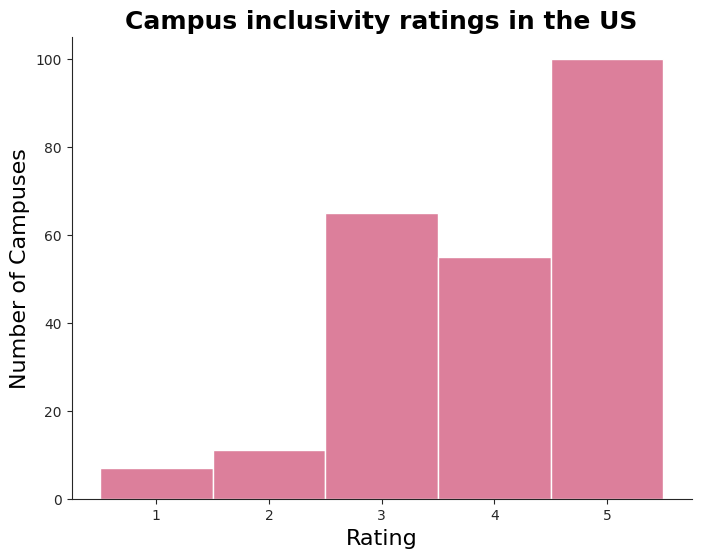

In [13]:
#Visualizing inclusion rating distribution at the state level
sns.set_style("ticks")
plt.figure(figsize = (8, 6))
plt.hist(rating_distribution["rating"],
         bins = 5,
         color = "#DC7F9B")
plt.title("Campus inclusivity ratings in the US", fontsize = 18, fontweight = "bold", color='black')
plt.xlabel("Rating", fontsize = 16, color='black')
plt.ylabel("Number of Campuses", fontsize = 16, color='black')
sns.despine()

#Specifying X-axis labels
bins = 5
hist, bins_edges = np.histogram(rating_distribution["rating"], bins=bins)
bin_centers = 0.5 * (bins_edges[1:] + bins_edges[:-1])
plt.xticks(ticks=bin_centers, labels=np.arange(1, 6, 1))

plt.show()

### State-level Analysis

The average rating for most states falls between 3.50 and 4.50, suggesting a generally high perception of inclusivity. The standard deviations vary, indicating that some states have more consistent ratings while others show greater variability.

To determine whether any state received disproportionately low or high inclusion ratings, state-wide average ratings were calculated by taking the mean inclusion rating of all campuses found in each state. It is important to note that nine states had no rating information: Alaska, Delaware, Louisiana, Mississippi, Nevada, South Carolina, Iowa, Wyoming, and Hawaii.

The states with the highest average inclusion ratings were Vermont (5.00 average, one campus rated), Indiana (4.83 average, three campuses rated), and Nebraska (4.75 average, two campuses rated). Conversely, the states with the lowest average campus inclusion ratings were South Dakota (2.00 average, one campus rated), Arkansas (2.25 average, two campuses rated), and Idaho (2.50 average, one campus rated). States with the highest number of campuses rated included New York (22 campuses rated with a state average of 4.11), California (17 campuses rated with a state average of 3.50), and Pennsylvania (21 campuses rated with a state average of 3.86).

In [14]:
rating_distribution.groupby('state')['rating'].describe().round(decimals=2) #State-level summary statistics on inclusion

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AL,1.0,4.50,NaN,4.5,4.50,4.50,4.50,4.5
AR,2.0,2.25,0.35,2.0,2.12,2.25,2.38,2.5
AZ,1.0,4.50,NaN,4.5,4.50,4.50,4.50,4.5
CA,17.0,3.50,0.83,1.5,3.00,3.50,4.00,5.0
CO,8.0,4.00,0.93,2.5,3.38,4.25,4.62,5.0
CT,3.0,4.33,0.58,4.0,4.00,4.00,4.50,5.0
DC,1.0,3.50,NaN,3.5,3.50,3.50,3.50,3.5
FL,3.0,3.83,0.76,3.0,3.50,4.00,4.25,4.5
GA,3.0,3.67,0.76,3.0,3.25,3.50,4.00,4.5


In [15]:
#Calculating state-level mode
def get_mode(group):
    return group.mode().iloc[0] if not group.mode().empty else None

mode_ratings = rating_distribution.groupby('state')['rating'].apply(get_mode).reset_index()
mode_ratings

,state,rating
0,AL,4.5
1,AR,2.0
2,AZ,4.5
3,CA,3.5
4,CO,4.5
5,CT,4.0
6,DC,3.5
7,FL,3.0
8,GA,3.0
9,ID,2.5


In [16]:
#Dictionary that can be used to map state names and abbreviations
state_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [17]:
us_states = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data in Motion/7-8-24-Data Analyst Challenge/contiguous-us-with-states_1201.geojson') #Load GeoJSON file
us_states.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [18]:
#Creating a column to use for merging geojson and df
us_states['state_abbr'] = us_states['state'].map(state_abbr)
us_states.head()

,state,adm1_code,population,geometry,state_abbr
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA


In [19]:
#Merging geojson and df
merged_data = rating_distribution.merge(us_states, left_on='state', right_on='state_abbr', how='left')
merged_data.head()

,campus_name,rating,state_x,state_y,adm1_code,population,geometry,state_abbr
0,Adelphi University,5.0,NY,New York,USA-3559,19378102.0,"POLYGON ((-74.67903 41.35549, -74.84044 41.426...",NY
1,Allegheny College,4.5,PA,Pennsylvania,USA-3560,12702379.0,"POLYGON ((-74.89175 40.08179, -75.12882 39.949...",PA
2,Antioch College,4.5,OH,Ohio,USA-3550,11536504.0,"POLYGON ((-82.21066 38.57948, -82.34083 38.440...",OH
3,Appalachian State University,4.5,NC,North Carolina,USA-3549,9535483.0,"POLYGON ((-75.86808 36.55118, -75.72731 35.550...",NC
4,Art Academy of Cincinnati,2.5,OH,Ohio,USA-3550,11536504.0,"POLYGON ((-82.21066 38.57948, -82.34083 38.440...",OH


In [20]:
#Extracting relevant columns for averaging
state_inclusivity = merged_data[['state_y', 'rating', 'geometry']]

#Generating state-wide inclusion rating averages
average_ratings = state_inclusivity.groupby(['state_y', 'geometry'])['rating'].mean().reset_index()
average_ratings.columns = ['state', 'geometry', 'average_rating']  #Renamint columns for clarity
average_ratings.head()

,state,geometry,average_rating
0,Alabama,"POLYGON ((-85.05442 31.10870, -85.00519 30.990...",4.50
1,Arizona,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",4.50
2,Arkansas,"POLYGON ((-89.66292 36.02307, -89.67351 35.940...",2.25
3,California,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",3.50
4,Colorado,"POLYGON ((-102.05017 40.00082, -102.04012 38.4...",4.00


In [21]:
#Creating a function to add states with no inclusion rating
def add_state_info(state_name, average_ratings_df, us_states_df):
    state_data = us_states_df[us_states_df['state'] == state_name] #Filtering us_states_df for the specified state

    if state_data.empty:
        return average_ratings_df  #Return original df if state not found

    geometry = state_data.iloc[0]['geometry'] #Extract geometry

    #Create a new df for the new row
    new_row = pd.DataFrame({
        'state': [state_name],
        'geometry': [geometry],
        'average_rating': [0.0]
    })

    #Concatenate average_ratings_df with the new row df
    average_ratings_df = pd.concat([average_ratings_df, new_row], ignore_index=True)

    return average_ratings_df

# Add states without an average rating with corresponding geometry
average_ratings = add_state_info('Alaska', average_ratings, us_states)
average_ratings = add_state_info('Delaware', average_ratings, us_states)
average_ratings = add_state_info('Louisiana', average_ratings, us_states)
average_ratings = add_state_info('Nevada', average_ratings, us_states)
average_ratings = add_state_info('Mississippi', average_ratings, us_states)
average_ratings = add_state_info('South Carolina', average_ratings, us_states)
average_ratings = add_state_info('Iowa', average_ratings, us_states)
average_ratings = add_state_info('Wyoming', average_ratings, us_states)
average_ratings = add_state_info('Hawaii', average_ratings, us_states)

#Display the updated df
average_ratings.tail()

,state,geometry,average_rating
43,Nevada,"POLYGON ((-114.030528 36.994099, -114.023629 3...",0.0
44,Mississippi,"POLYGON ((-88.166964 34.999673, -88.095522 34....",0.0
45,South Carolina,"POLYGON ((-78.554114 33.861422, -79.06067 33.4...",0.0
46,Iowa,"POLYGON ((-90.156636 42.103735, -90.21007 41.8...",0.0
47,Wyoming,"POLYGON ((-111.067194 44.541597, -111.071406 4...",0.0


In [22]:
#Calculating top 5 states with highest average inclusion rating
top_5_states = average_ratings.nlargest(5, 'average_rating')
top_5_states

,state,geometry,average_rating
36,Vermont,"POLYGON ((-71.503511 45.007796, -71.620455 44....",5.000000
10,Indiana,"POLYGON ((-84.806756 41.677741, -84.809934 40....",4.833333
20,Nebraska,"POLYGON ((-95.45254 40.215143, -95.322884 40.0...",4.750000
17,Minnesota,"POLYGON ((-89.599409 48.010274, -89.488885 48....",4.666667
0,Alabama,"POLYGON ((-85.054415 31.108696, -85.005193 30....",4.500000


In [ ]:
#Calculating the states with lowest average inclusion rating
filtered_df = average_ratings[average_ratings['average_rating'] > 0] #Filter out states without any rating

#Calculate states with lowest inclusion rating (excluding those with value 0)
lowest_inclusion_states = filtered_df.nsmallest(5, 'average_rating')
lowest_inclusion_states

,state,geometry,average_rating
32,South Dakota,"POLYGON ((-96.75427 42.633961, -97.028387 42.7...",2.000000
2,Arkansas,"POLYGON ((-89.662919 36.023073, -89.673513 35....",2.250000
8,Idaho,"POLYGON ((-111.049728 44.488163, -111.050245 4...",2.500000
31,Rhode Island,"POLYGON ((-71.1479 41.647587, -71.120382 41.49...",2.833333
3,California,"POLYGON ((-114.354901 34.464667, -114.165972 3...",3.500000


In [23]:
gdf = gpd.GeoDataFrame(average_ratings, geometry='geometry') #Transform geometry column into geojson file

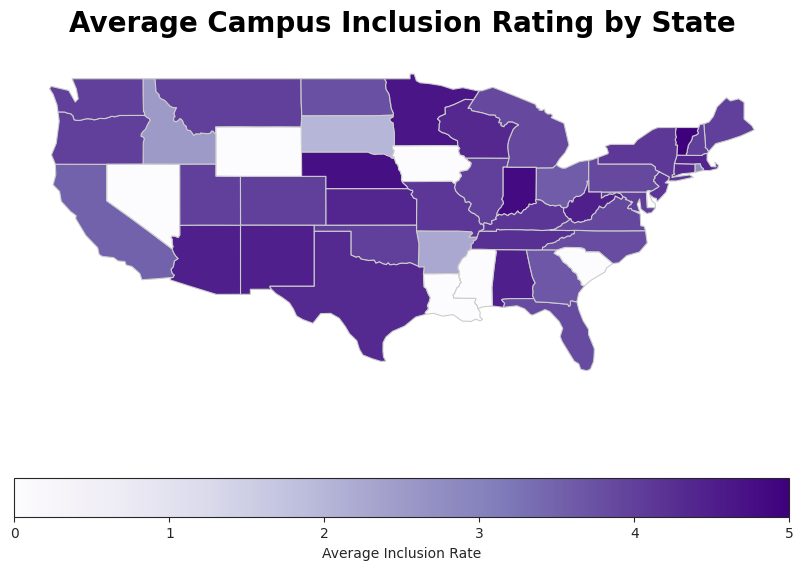

In [24]:
#Choropleth showing average inclusion rates by state
fig, ax = plt.subplots(figsize=(10, 8))
plot = gdf.plot(column='average_rating', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                legend_kwds={'label': "Average Inclusion Rate", 'orientation': "horizontal"})

ax.set_title('Average Campus Inclusion Rating by State', color='black', fontweight='bold', fontsize=20, pad=20)
ax.set_axis_off()
plt.show()

# Relationship between Student Population and Inclusion Rating

Is there a correlation between the number of students at a campus and its inclusivity rating? Do larger campuses tend to have higher or lower ratings?

In [26]:
inclusion_by_population_size = df.loc[:, ['students', 'rating', 'student_body_size']] #Extracting relevant columns
inclusion_by_population_size

,students,rating,student_body_size
0,7859,5.0,Small
1,1800,4.5,Small
2,125,4.5,Very Small
3,20436,4.5,Large
4,260,2.5,Very Small
...,...,...,...
233,8000,4.5,Small
234,1132,3.0,Small
235,4039,4.5,Small
236,6738,3.0,Small


In [27]:
#Testing if study population size varibale is normally distributed
stat, p_value = stats.shapiro(inclusion_by_population_size['students'])
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk Test: Statistic=0.8432956704317619, p-value=8.721928883389088e-15


In [28]:
#Testing if rating varibale is normally distributed
stat, p_value = stats.shapiro(inclusion_by_population_size['rating'])
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk Test: Statistic=0.9192601911027231, p-value=4.4191336954476766e-10


Spearman Rank Correlation Coefficient: 0.3969184837052166
P-value: 2.0970648794827263e-10


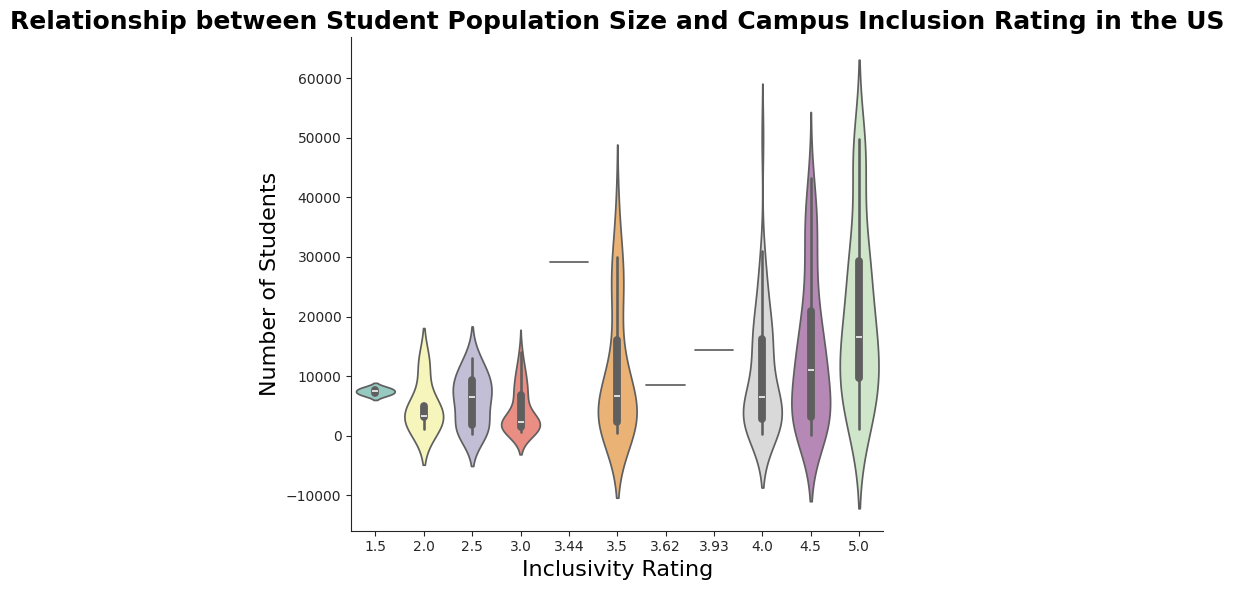

In [29]:
#Correlation between student population size and inclusion rating
correlation, p_value = spearmanr(inclusion_by_population_size['students'], inclusion_by_population_size['rating'])
print(f"Spearman Rank Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

sns.set_style("ticks")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.violinplot(x = "rating",
            y = "students",
            data = inclusion_by_population_size,
            hue='rating',
            palette='Set3',
            legend=False)
plt.title("Relationship between Student Population Size and Campus Inclusion Rating in the US",
          fontsize = 18,
          weight = "bold",
          color = 'black')
plt.xlabel('Inclusivity Rating', color = 'black', fontsize = 16)
plt.ylabel('Number of Students', color = 'black', fontsize = 16)
sns.despine()
plt.tight_layout()
plt.show()

The relationship between student population size and inclusion rating is moderately strong and significant. Based on these results, generally, larger campuses tend to have higher inclusivity ratings.

In [32]:
#Decriptive statistics by student body size
inclusion_by_population_size.groupby('student_body_size')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
student_body_size,,,,,,,,
Large,36.0,4.331667,0.575785,3.44,4.0,4.5,5.0,5.0
Medium,53.0,4.215660,0.737588,2.00,4.0,4.5,5.0,5.0
Small,125.0,3.700960,0.825336,1.50,3.0,4.0,4.5,5.0
Very Large,15.0,4.666667,0.449868,3.50,4.5,5.0,5.0,5.0
Very Small,9.0,3.666667,0.829156,2.50,3.0,4.0,4.5,4.5


In [34]:
#Calculating the most frequent rating by student body size
inclusion_by_population_size.groupby('student_body_size')['rating'].apply(lambda x: x.mode()[0])

,rating
student_body_size,
Large,5.0
Medium,5.0
Small,4.0
Very Large,5.0
Very Small,4.5


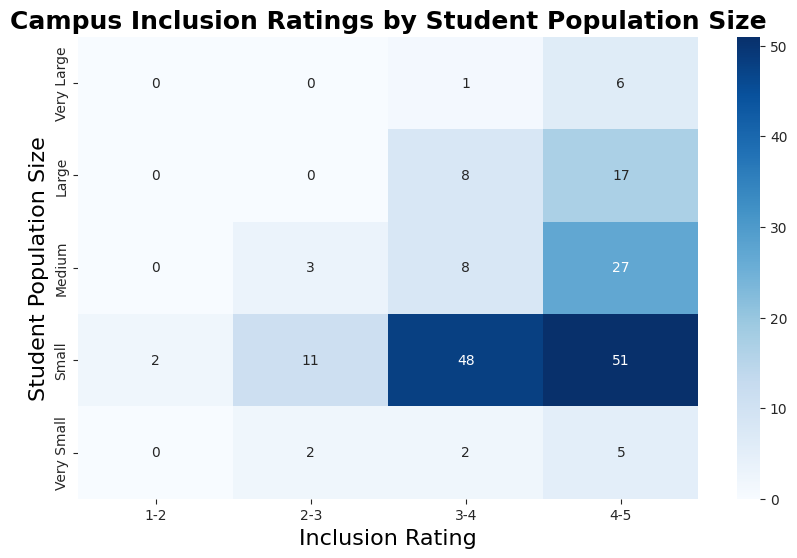

In [36]:
#Visualizing when student population size is categorized
bins = [1, 2, 3, 4, 5]
labels = ['1-2', '2-3', '3-4', '4-5']
inclusion_by_population_size['rating_bin'] = pd.cut(inclusion_by_population_size['rating'], bins=bins, labels=labels, right=False)
ordered_population_categories = ['Very Large', 'Large', 'Medium', 'Small', 'Very Small']

pivot_table = pd.crosstab(inclusion_by_population_size['student_body_size'], inclusion_by_population_size['rating_bin'])
pivot_table = pivot_table.reindex(index=ordered_population_categories)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Campus Inclusion Ratings by Student Population Size',  fontsize = 18,weight = "bold", color = 'black')
plt.xlabel('Inclusion Rating', color = 'black', fontsize = 16)
plt.ylabel('Student Population Size', color = 'black', fontsize = 16)
plt.show()

Campuses with a very large student population had a mean rating of 4.67, the highest among all categories, with ratings ranging from 3.50 to 5.00. In this category, 25% of campuses received ratings of 4.50 or lower, while another 25% received ratings of 5.00 or higher. The most frequent rating was 5.00.

Campuses with a large student population had a mean inclusion rating of 4.33, indicating a high perception of inclusivity. The ratings ranged from 3.44 to 5.00, with 25% of campuses receiving ratings of 4.00 or lower and another 25% receiving ratings of 5.00 or higher. The most frequently received rating was 5.00.

Campuses with a medium-sized student population had a mean rating of 4.22, showing a strong perception of inclusivity, although with slightly more variation compared to large campuses. Ratings ranged from 2.00 to 5.00. In this category, 25% of campuses received ratings of 4.0 or lower, while another 25% received ratings of 5.00 or higher. The most common rating was 5.00.

Campuses with a small student population had a mean rating of 3.70, which is lower than that of large and medium-sized campuses. Ratings ranged from 1.50 to 5.00, with 25% of campuses receiving ratings of 3.00 or lower and another 25% receiving ratings of 4.50 or higher. The most frequently received rating was 4.00.

Campuses with a very small student population had a mean rating of 3.67, which is slightly lower than small and medium-sized campuses. Ratings ranged from 2.50 to 4.50, with 25% of campuses receiving ratings of 3.00 or lower and another 25% receiving ratings of 4.50 or higher. The most frequent rating was 4.5.

Campus inclusion ratings between 4.00 and 5.00 were the most common across campuses, regardless of student body size. Ratings between 1.00 and 2.00 were the rarest, only seen in two campuses with a small (1,000-10,000 students) student body size. Notably, no campuses with a large (30,000-40,000 students) or very large (40,000-50,000 students) student body size received ratings below 3.00, suggesting a high perception of inclusivity among larger campuses. This finding is consistent with the results of the correlation analysis, which indicated a positive relationship between student body size and inclusivity ratings.

# Inclusion Rating by Community Type

How does the community type affect the inclusivity rating of a campus? Compare the inclusivity ratings across different community types (e.g., large urban city, medium city, very small town, rural community). Use appropriate statistical tests and visualizations to support your analysis.

In [38]:
inclusion_by_community = df.loc[:, ['students', 'rating', 'community_type']] #Extracting relevant columns
inclusion_by_community.head()

,students,rating,community_type
0,7859,5.0,small town
1,1800,4.5,small town
2,125,4.5,rural community
3,20436,4.5,small town
4,260,2.5,medium city


In [39]:
inclusion_by_community['community_type'].unique() #Checking number of unique community types

array(['small town', 'rural community', 'medium city', 'large urban city',
       'very small town', 'small city'], dtype=object)

In [40]:
#Decriptive statistics by community type
inclusion_by_community.groupby('community_type')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
community_type,,,,,,,,
large urban city,44.0,4.113636,0.820264,1.5,3.5,4.50,4.625,5.0
medium city,54.0,4.072778,0.779682,2.5,3.5,4.00,4.875,5.0
rural community,15.0,3.566667,0.820859,2.0,3.0,3.50,4.250,4.5
small city,76.0,3.999211,0.841139,1.5,3.5,4.00,4.500,5.0
small town,37.0,3.895135,0.745123,2.0,3.5,4.00,4.500,5.0
very small town,12.0,3.541667,0.838243,2.0,3.0,3.75,4.125,4.5


In [41]:
#Calculating the most frequent rating by community type
inclusion_by_community.groupby('community_type')['rating'].apply(lambda x: x.mode()[0])

,rating
community_type,
large urban city,4.5
medium city,5.0
rural community,4.5
small city,4.0
small town,4.0
very small town,3.0


In [42]:
#Kruskal-Wallis test to evaluate relationship between community type and inclusion rating
kruskal_result = kruskal(
    inclusion_by_community[inclusion_by_community['community_type'] == 'large urban city']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'medium city']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'very small town']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'rural community']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'small city']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'small town']['rating'])

kruskal_result

KruskalResult(statistic=9.780940982310174, pvalue=0.08168553309961925)

In [43]:
#Posthoc test comparing community types
posthoc = sp.posthoc_dunn(inclusion_by_community, val_col='rating', group_col='community_type', p_adjust='holm')
posthoc

,large urban city,medium city,rural community,small city,small town,very small town
large urban city,1.000000,1.000000,0.332506,1.000000,1.0,0.418822
medium city,1.000000,1.000000,0.536253,1.000000,1.0,0.629822
rural community,0.332506,0.536253,1.000000,0.648563,1.0,1.000000
small city,1.000000,1.000000,0.648563,1.000000,1.0,0.730964
small town,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
very small town,0.418822,0.629822,1.000000,0.730964,1.0,1.000000


In [44]:
inclusion_by_community.groupby('community_type')['rating'].count()

,rating
community_type,
large urban city,44
medium city,54
rural community,15
small city,76
small town,37
very small town,12


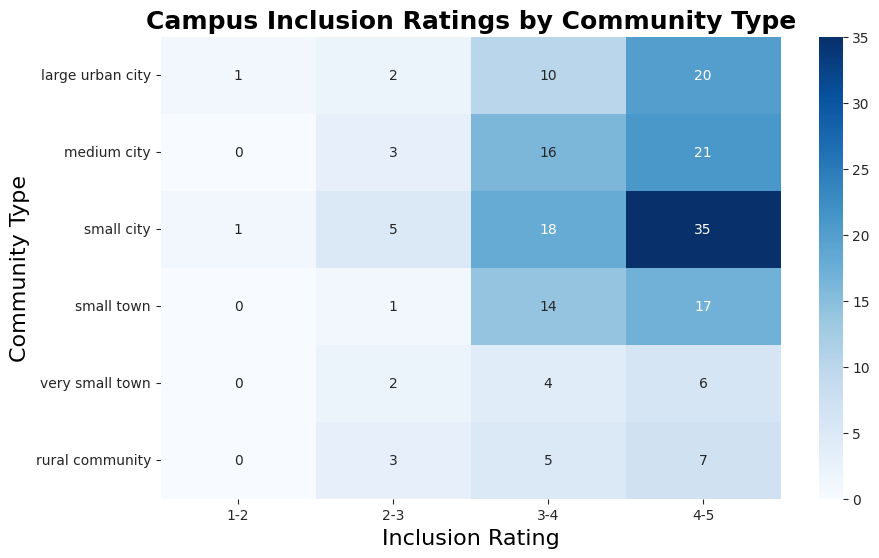

In [45]:
#Visualizing when student population size is categorized
bins = [1, 2, 3, 4, 5]
labels = ['1-2', '2-3', '3-4', '4-5']
inclusion_by_community['rating_bin'] = pd.cut(inclusion_by_community['rating'], bins=bins, labels=labels, right=False)
ordered_community_categories = ['large urban city', 'medium city', 'small city', 'small town', 'very small town', 'rural community']

pivot_table2 = pd.crosstab(inclusion_by_community['community_type'], inclusion_by_community['rating_bin'])
pivot_table2 = pivot_table2.reindex(index=ordered_community_categories)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table2, annot=True, cmap='Blues')
plt.title('Campus Inclusion Ratings by Community Type',  fontsize = 18,weight = "bold", color = 'black')
plt.xlabel('Inclusion Rating', color = 'black', fontsize = 16)
plt.ylabel('Community Type', color = 'black', fontsize = 16)
plt.show()

Campuses in large urban cities had a mean inclusion rating of 4.11, suggesting that large urban cities generally have high inclusivity perceptions. The ratings ranged from a minimum of 1.50 to a maximum of 5.00. Out of the campuses located in large urban cities, 25% received an inclusion rating of 3.50 or lower, while 25% received a rating of 4.63 or higher. The most frequently received rating was 4.50 for campuses located in large urban cities.

Campuses in medium cities had a mean inclusion rating of 4.07, showing a generally high perception of inclusivity. Ratings ranged from 2.50 to 5.00. Out of the campuses located in medium cities, 25% received an inclusion rating of 3.50 or lower, while 25% received a rating of 4.88 or higher. The most common rating was 5.00 for campuses located in medium cities.

Campuses in small cities had a mean inclusion rating of 4.00, indicating generally high inclusivity ratings similar to larger urban areas. Ratings ranged from 1.50 to 5.00. Out of the campuses located in small cities, 25% received an inclusion rating of 3.50 or lower, while 25% received a rating of 4.50 or higher. The most frequently received rating was 4.00 for campuses located in small cities.

Campuses in small towns had a mean rating of 3.90, slightly lower on average compared to urban and small city areas but still positive. Ratings ranged from 2.00 to 5.00. Out of the campuses located in small towns, 25% received an inclusion rating of 3.50 or lower, while 25% received a rating of 4.50 or higher. The most common rating was 4.00 for campuses located in small towns.

Campuses in very small towns had a mean rating of 3.54, indicating a somewhat lower perception of inclusivity compared to other community types. Ratings ranged from 2.00 to 4.50. Out of the campuses located in very small towns, 25% received an inclusion rating of 3.00 or lower, while 25% received a rating of 4.13 or higher. The most frequently received rating was 3.0 for campuses located in very small towns.

Campuses in rural communities had a mean rating of 3.57,indicating a distribution that is somewhat lower than urban settings but still favorable. Ratings ranged from 2.00 to 4.50. Out of the campuses located in rural communities, 25% received an inclusion rating of 3.00 or lower, while 25% received a rating of 4.25 or higher. The most common rating was 4.50 for campuses located in rural areas.

The heatmap reinforces that campuses in more urban settings generally have higher inclusivity ratings; however, the sample size plays a significant role in the distribution of these ratings.


# Outlier Ratings

Which campuses are the outliers in terms of their inclusivity rating? Identify campuses that have significantly higher or lower inclusivity ratings compared to others in similar community types or with similar student populations. What characteristics or factors might explain these outliers?

### Characteristics of Campuses with Lowest Inclusivity Ratings

The trends suggest that campuses in small cities and rural communities with small student populations tend to have lower inclusion ratings. No geographical trends are apparent among campuses that received lower ratings.

In [47]:
#Select the required columns
selected_columns = ['campus_name', 'state', 'city', 'rating', 'community_type', 'student_body_size']

#Filter the df to include only rows with lowest ratings
lowest_rated_campuses = df[df['rating'] <= 2.5]

#Display results
lowest_rated_campuses[selected_columns]

,campus_name,state,city,rating,community_type,student_body_size
4,Art Academy of Cincinnati,OH,Cincinnati,2.5,medium city,Very Small
11,Big Sandy Community and Technical College,KY,Prestonsburg,2.5,rural community,Small
15,Bryant University,RI,Smithfield,2.0,small town,Small
22,Camden County College,NJ,Blackwood,2.5,rural community,Small
23,Catawba College,NC,Salisbury,2.0,rural community,Small
31,Colorado College,CO,Colorado Springs,2.5,large urban city,Small
36,Dakota State University,SD,Madison,2.0,very small town,Small
38,Diablo Valley College,CA,Pleasant Hill,1.5,small city,Small
69,Henry Ford Community College,MI,Dearborn,2.5,small city,Medium
76,Joliet Junior College,IL,Joliet,2.5,small city,Small


In [48]:
#Count of lowest rated campuses by state
lowest_rated_campuses['state'].value_counts()

,count
state,
RI,2
CA,2
IL,2
AR,2
OH,1
KY,1
NJ,1
NC,1
CO,1


In [49]:
#Count of lowest rated campuses by community type
lowest_rated_campuses['community_type'].value_counts()

,count
community_type,
small city,6
medium city,3
rural community,3
large urban city,3
very small town,2
small town,1


In [51]:
#Count of lowest rated campuses by student population size
lowest_rated_campuses['student_body_size'].value_counts()

,count
student_body_size,
Small,13
Medium,3
Very Small,2


### Characteristics of Campuses with Highest Inclusivity Ratings

The trends suggest that campuses in medium-sized communities, with small or medium-sized student populations, located in the Northeast and Midwest tend to receive the highest inclusivity ratings.

In [53]:
#Select the required columns
selected_columns = ['campus_name', 'state', 'city', 'rating', 'community_type', 'student_body_size']

#Filter the df to include only rows with highest ratings
highest_rated_campuses = df[df['rating'] == 5.0]

#Display results
highest_rated_campuses[selected_columns]

,campus_name,state,city,rating,community_type,student_body_size
0,Adelphi University,NY,Garden City,5.0,small town,Small
5,Augsburg University,MN,Minneapolis,5.0,large urban city,Small
49,Elon University,NC,Elon,5.0,small town,Small
59,George Mason University,VA,Fairfax,5.0,small city,Very Large
64,Guilford College,NC,Greensboro,5.0,medium city,Small
71,Hofstra University,NY,Hempstead,5.0,medium city,Small
73,"Indiana University, Bloomington",IN,Bloomington,5.0,small city,Very Large
74,Ithaca College,NY,Ithaca,5.0,small city,Small
79,Kansas State University,KS,Manhattan,5.0,small city,Medium
81,Kent State University,OH,Kent,5.0,small city,Large


In [54]:
#Count of highest rated campuses by state
highest_rated_campuses['state'].value_counts()

,count
state,
NY,7
PA,3
KY,3
IL,3
IN,2
WI,2
VA,2
NJ,2
NC,2


In [55]:
#Count of highest rated campuses by community type
highest_rated_campuses['community_type'].value_counts()

,count
community_type,
small city,17
medium city,14
large urban city,11
small town,5


In [57]:
#Count of highest rated campuses by student population size
highest_rated_campuses['student_body_size'].value_counts()

,count
student_body_size,
Medium,15
Small,13
Large,11
Very Large,8
